#  **Desafio House Rocket**
 
A ideia do desafio é poder comprar casas com preço baixo e fazer a revenda com os preços mais altos.
 
Assim, encontrar bons negócios dentro do portfólio disponível, ou seja, encontrar casas com preço mais baixo, em ótimas localizações e que tenham um ótimo potencial de revenda por um preço mais alto.

Novas perguntas impostas:
1. Qual o número de imóveis por ano de construção?
2. Qual o menor número de quartos por ano de construção de imóveis?
3. Qual o preço de compra mais alto por cada número de quartos?
4. Qual a soma de todos os preços de compra por número de quartos?
5. Qual a soma de todos os preços de compras por número de quartos e banheiros?
6. Qual o tamanho médio das salas dos imóveis por ano de construção?
7. Qual o tamanho mediano das salas dos imóveis por ano de construção?
8. Qual o desvio padrão do tamanho das salas dos imóveis por ano de construção?
9. Como é o crescimento médio de preços de compras dos imóveis, por ano, por dia e pela semana do ano?
10. Eu gostaria de olhar no mapa e conseguir identificar as casas com o maior preço.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1 - Importação das bibliotecas

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec
import plotly.express as px

# Formatação para numeros em notaçao cientifica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 2 - Lendo a base de dados

In [ ]:
PATH = 'inform the path of the base'
data = pd.read_csv(PATH)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


# 3 - Respondendo as Perguntas

##  3.1- Quantos imóveis existem por número de quartos?

In [ ]:
df_grouped = data[['id', 'bedrooms']].groupby('bedrooms')

for bedrooms, frame in df_grouped:
  print('Para {} quartos, existem {} imóveis'.format(bedrooms, frame.shape[0]))

Para 0 quartos, existem 13 imóveis
Para 1 quartos, existem 199 imóveis
Para 2 quartos, existem 2760 imóveis
Para 3 quartos, existem 9824 imóveis
Para 4 quartos, existem 6882 imóveis
Para 5 quartos, existem 1601 imóveis
Para 6 quartos, existem 272 imóveis
Para 7 quartos, existem 38 imóveis
Para 8 quartos, existem 13 imóveis
Para 9 quartos, existem 6 imóveis
Para 10 quartos, existem 3 imóveis
Para 11 quartos, existem 1 imóveis
Para 33 quartos, existem 1 imóveis


## 3.2 - Qual o número de imóveis por ano de construção?

In [ ]:
data[['id', 'yr_built']].groupby('yr_built').count()

,id
yr_built,
1900,87
1901,29
1902,27
1903,46
1904,45
...,...
2011,130
2012,170
2013,201


## 3.3 - Qual o menor número de quartos por ano de construção de imóveis?

In [ ]:
data[['bedrooms', 'yr_built']].groupby('yr_built').min()

,bedrooms
yr_built,
1900,1
1901,2
1902,2
1903,1
1904,2
...,...
2011,1
2012,2
2013,2


## 3.4 - Qual o preço de compra mais alto por cada número de quartos?

In [ ]:
data[['price', 'bedrooms']].groupby('bedrooms').max()

,price
bedrooms,
0,1295650.000
1,1247000.000
2,3278000.000
3,3800000.000
4,4489000.000
5,7062500.000
6,7700000.000
7,3200000.000
8,3300000.000


## 3.5 - Qual a soma de todos os preços de compra por número de quartos?

In [ ]:
data[['price', 'bedrooms']].groupby('bedrooms').sum()

,price
bedrooms,
0,5323550.000
1,63210934.000
2,1107788602.000
3,4580263939.000
4,4372957028.000
5,1259346326.000
6,224541613.000
7,36145017.000
8,14366000.000


## 3.6 - Qual a soma de todos os preços de compras por número de quartos e banheiros?

In [ ]:
data[['price', 'bedrooms', 'bathrooms']].groupby(['bedrooms', 'bathrooms']).sum()

price
bedrooms bathrooms            
0        0.000     3642600.000
         0.750      265000.000
         1.000      228000.000
         1.500      288000.000
         2.500      899950.000
...                        ...
10       2.000      650000.000
         3.000      660000.000
         5.250     1148000.000
11       3.000      520000.000
33       1.750      640000.000

[144 rows x 1 columns]

## 3.7 - Qual o tamanho médio das salas dos imóveis por ano de construção?

In [ ]:
data[['sqft_living', 'yr_built']].groupby('yr_built').mean()

,sqft_living
yr_built,
1900,1732.011
1901,1763.621
1902,1919.630
1903,1507.739
1904,1603.178
...,...
2011,2313.685
2012,2378.741
2013,2636.592


## 3.8 - Qual o tamanho mediano das salas dos imóveis por ano de construção?

In [ ]:
data[['sqft_living', 'yr_built']].groupby('yr_built').median()

,sqft_living
yr_built,
1900,1540.000
1901,1610.000
1902,1600.000
1903,1505.000
1904,1280.000
...,...
2011,2270.000
2012,2237.500
2013,2580.000


## 3.9 - Qual o desvio padrão do tamanho das salas dos imóveis por ano de construção?

In [ ]:
data[['sqft_living', 'yr_built']].groupby('yr_built').std()

,sqft_living
yr_built,
1900,732.944
1901,668.232
1902,878.659
1903,469.723
1904,1076.871
...,...
2011,804.864
2012,771.430
2013,883.499


## 3.10 - Como é o crescimento médio de preços de compras dos imóveis, por ano, por dia e pela semana do ano?

Fazendo as analises por graficos

In [ ]:
# Fazendo a criação de uma nova feature year
data['year'] = pd.to_datetime(data['date']).dt.year

In [ ]:
by_year = data[['price', 'year']].groupby('year').sum().reset_index()
by_year

,year,price
0,2014,7889841842.000
1,2015,3783083166.000


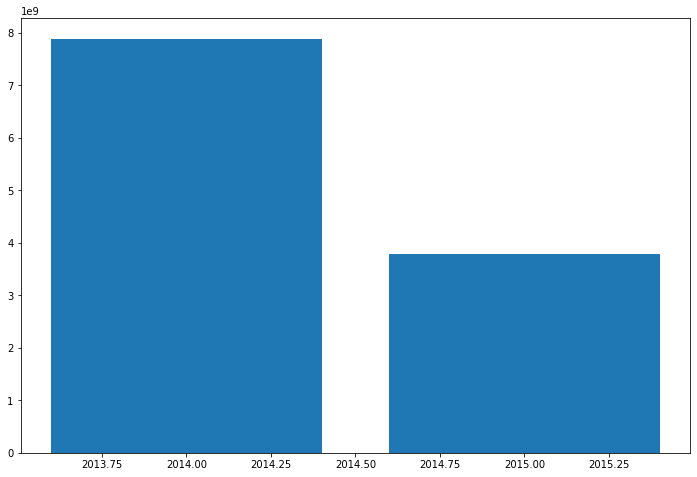

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(by_year['year'], by_year['price'])
plt.show()

In [ ]:
# Fazendo a criação de uma nova feature year
data['day'] = pd.to_datetime(data['date'])

by_day = data[['price', 'day']].groupby('day').mean().reset_index()
by_day

,day,price
0,2014-05-02,526251.493
1,2014-05-03,466970.000
2,2014-05-04,576690.000
3,2014-05-05,580938.607
4,2014-05-06,534047.904
...,...,...
367,2015-05-13,511623.871
368,2015-05-14,603436.273
369,2015-05-15,450000.000
370,2015-05-24,445500.000


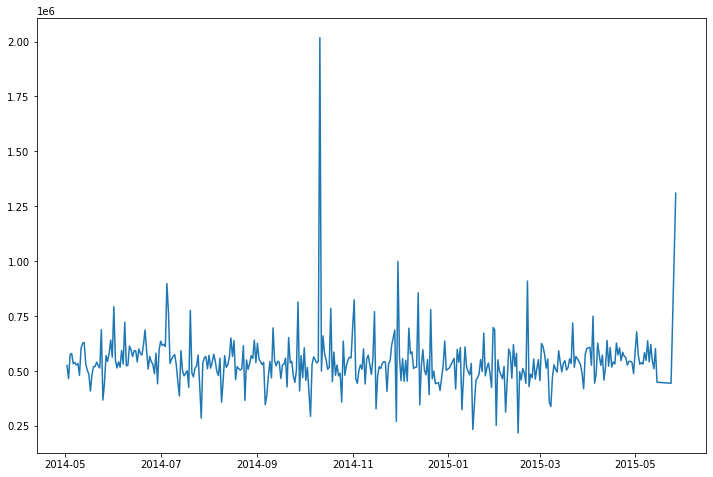

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(by_day['day'], by_day['price'])
plt.show()

In [ ]:
# Fazendo a criação de uma nova feature year
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')

by_week_year = data[['price', 'year_week']].groupby('year_week').mean().reset_index()
by_week_year

,year_week,price
0,2014-17,522911.690
1,2014-18,543577.095
2,2014-19,558750.111
3,2014-20,528149.942
4,2014-21,572404.350
5,2014-22,544356.854
6,2014-23,568966.377
7,2014-24,586926.500
8,2014-25,532152.039
9,2014-26,621287.216


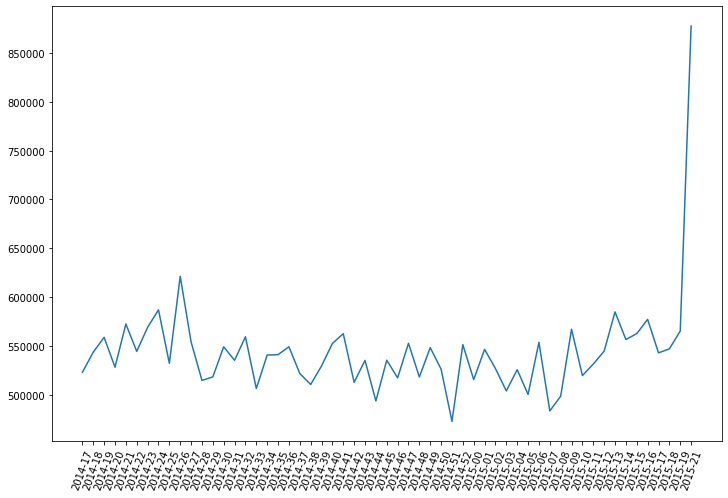

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(by_week_year['year_week'], by_week_year['price'])
plt.xticks(rotation=70)
plt.show()

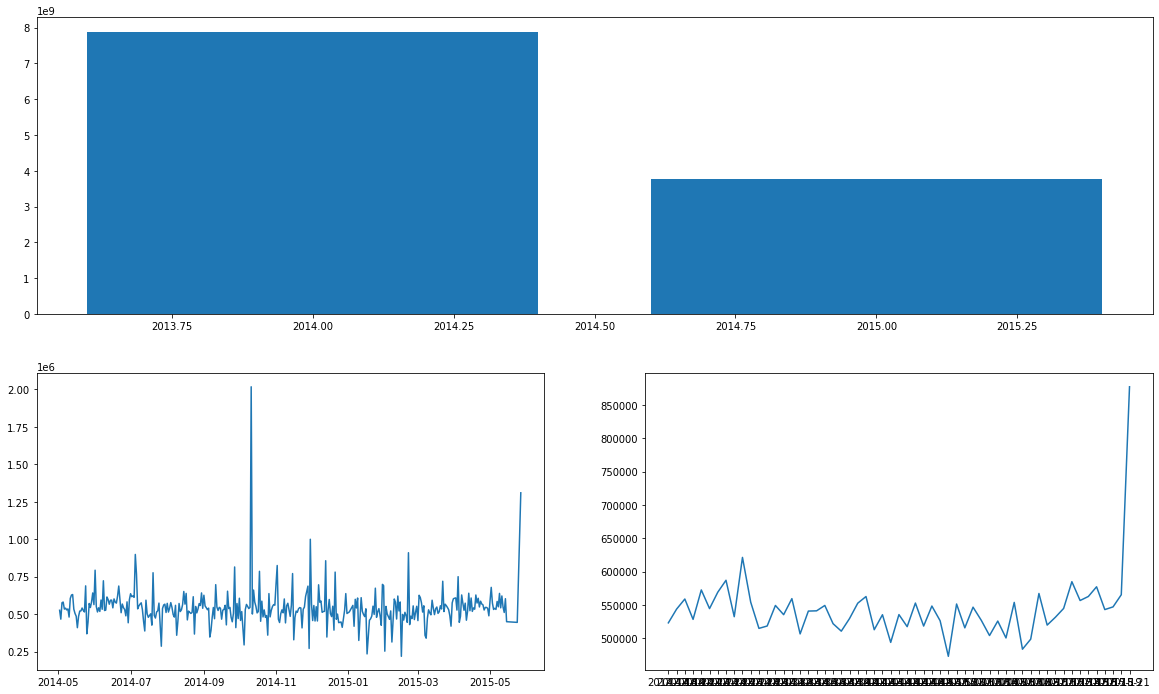

In [ ]:
fig = plt.figure(figsize=(20,12))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure = fig)

ax1 = fig.add_subplot(specs[0, :])
ax2 = fig.add_subplot(specs[1, 0])
ax3 = fig.add_subplot(specs[1, 1])

ax1.bar(by_year['year'], by_year['price'])
ax2.plot(by_day['day'], by_day['price'])
ax3.plot(by_week_year['year_week'], by_week_year['price'])

## 3.11 - Eu gostaria de olhar no mapa e conseguir identificar as casas com o maior preço.

In [ ]:
houses = data[['id', 'lat', 'long', 'price']]

fig = px.scatter_mapbox(houses,
                        lat = 'lat',
                        lon = 'long',
                        size = 'price',
                        color_continuous_scale = px.colors.cyclical.IceFire,
                        size_max = 15,
                        zoom = 10)

fig.update_layout(mapbox_style = 'open-street-map',
                  height = 600,
                  margin = {
                      'r': 0,
                      't': 0,
                      'l': 0,
                      'b': 0
                  })
fig.show()